In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

# 各種スケーリングのテスト

In [2]:
x = lambda x, : x
y = lambda x, : x * 100

In [3]:
import random

list_X = []
list_Y = []

random.seed = 0
make_Y = lambda i, : 2 * i + round(random.random() * 30, 1)

for i in range(1,1000):
    list_X.append(i)
    list_Y.append(make_Y(i))

In [4]:
df1 = pd.DataFrame()
df1["x"] = list_X
df1["y"] = list_Y

In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
x,999.0,500.000000,288.530761,1.0,250.5,500.0,749.50,999.0
y,999.0,1015.512813,576.953291,16.8,515.9,1016.2,1512.55,2020.0


In [6]:
# df2 は、df1に外れ値を追加した
df2 = df1.copy()
df2.loc[500, "y"] = 10000
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
x,999.0,500.0000,288.530761,1.0,250.5,500.0,749.5,999.0
y,999.0,1024.4997,643.177260,16.8,515.9,1016.2,1513.5,10000.0


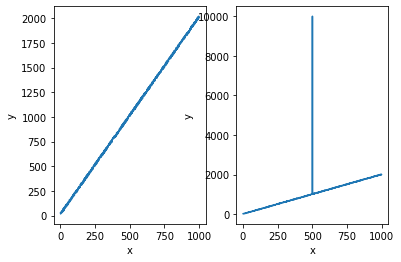

In [7]:
#
fig, axes = plt.subplots(ncols=2)
sns.lineplot(x=df1["x"], y =df1["y"], ax = axes[0])
sns.lineplot(x=df2["x"], y =df2["y"], ax = axes[1])

# ★MinMaxScaller
0～1にする

In [8]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [9]:
mms_df1 = pd.DataFrame(mms.fit_transform(df1))
mms_df1.columns = df1.columns
mms_df1.describe().T
# y：0～1の範囲に収まっている

,count,mean,std,min,25%,50%,75%,max
x,999.0,0.500000,0.289109,0.0,0.250000,0.500000,0.75000,1.0
y,999.0,0.498559,0.288016,0.0,0.249151,0.498902,0.74668,1.0


In [10]:
mms_df2 = pd.DataFrame(mms.fit_transform(df2))
mms_df2.columns = df2.columns
mms_df2.describe().T
# y：0～1の範囲に収まっているけど、ハズレ値である1000に引きずられてしまっている

,count,mean,std,min,25%,50%,75%,max
x,999.0,0.50000,0.289109,0.0,0.250000,0.500000,0.750000,1.0
y,999.0,0.10094,0.064426,0.0,0.049994,0.100108,0.149922,1.0


### ハズレ値が混じってるとそれに引きずられる！

# ★Standard Scaller
標準化（平均0, 分散1）にする

In [11]:
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()

In [12]:
sts_df1 = pd.DataFrame(sts.fit_transform(df1))
sts_df1.columns = df1.columns
sts_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
x,999.0,0.000000e+00,1.000501,-1.730318,-0.865159,0.000000,0.865159,1.730318
y,999.0,-2.845016e-16,1.000501,-1.731879,-0.866384,0.001192,0.861918,1.741892


In [30]:
sts_df2 = pd.DataFrame(sts.fit_transform(df2))
sts_df2.columns = df2.columns
sts_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
x,999.0,0.000000e+00,1.000501,-1.730318,-0.865159,0.000000,0.865159,1.730318
y,999.0,-5.690032e-17,1.000501,-1.567537,-0.791157,-0.012911,0.760669,13.961930


### 確かにdf2もdf1も平均０、分散１になっている

# ★RobustScaler
変換前のデータに極端に大きな値または小さな値が含まれていた場合、  
標準化を行うと大きく結果が変わってしまう。  
これを避けるため、データの四分位点を基準にして標準化を行う。

In [15]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

In [18]:
rbs_df1 = pd.DataFrame(rbs.fit_transform(df1))
rbs_df1.columns = df1.columns
rbs_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
x,999.0,0.000000,0.578218,-1.000000,-0.500000,0.0,0.500000,1.000000
y,999.0,-0.000689,0.578893,-1.002759,-0.501982,0.0,0.498018,1.007174


In [17]:
rbs_df2 = pd.DataFrame(rbs.fit_transform(df2))
rbs_df2.columns = df2.columns
rbs_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
x,999.0,0.00000,0.578218,-1.000000,-0.500000,0.0,0.500000,1.000000
y,999.0,0.00832,0.644725,-1.001804,-0.501504,0.0,0.498496,9.005413


### 確かに4分位はdf1とdf2でほぼほぼ同じ

# ★結局どれがいいの？

In [24]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# from xgboost import xg

from sklearn.metrics import mean_absolute_error

In [70]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(pd.DataFrame(x_train), pd.DataFrame(y_train))
    predict_y = model.predict(pd.DataFrame(x_test))
    print(model.__class__)
    print("score(train):", model.score( pd.DataFrame(x_train), pd.DataFrame(y_train) ) )
    print("score(test) :", model.score( pd.DataFrame(x_test),  pd.DataFrame(y_test)  ) )
    print("MAE         :", mean_absolute_error( pd.DataFrame(predict_y), pd.DataFrame(y_test) ) )

## ランダムフォレスト

In [72]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df1["x"], df1["y"], test_size=0.3)
x_train2, x_test2, y_train2, y_test2 = train_test_split(df2["x"], df2["y"], test_size=0.3)

In [75]:
print("◆RandomForest@df1")
get_score(rf, x_train1, x_test1, y_train1, y_test1)
print("◆RandomForest@df2")
get_score(rf, x_train2, x_test2, y_train2, y_test2)

◆RandomForest@df1
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
score(train): 0.9999408100984821
score(test) : 0.9996220692403499
MAE         : 9.137000000000011
◆RandomForest@df2
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
score(train): 0.9375876864283984
score(test) : 0.7066533689350515
MAE         : 29.415899999999997


C:\MyProgram\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\MyProgram\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [99]:
mms_x_train1, mms_x_test1, mms_y_train1, mms_y_test1 = train_test_split(mms_df1["x"], mms_df1["y"], test_size=0.3)
mms_x_train2, mms_x_test2, mms_y_train2, mms_y_test2 = train_test_split(mms_df2["x"], mms_df2["y"], test_size=0.3)

In [100]:
print("◆RandomForest@df1")
get_score(rf, mms_x_train1, mms_x_test1, mms_y_train1, mms_y_test1)
print("◆RandomForest@df2")
get_score(rf, mms_x_train2, mms_x_test2, mms_y_train2, mms_y_test2)

◆RandomForest@df1
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
score(train): 0.9999443958177248
score(test) : 0.9996523038406837
MAE         : 0.004496690969052689
◆RandomForest@df2
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
score(train): 0.999942005949615
score(test) : 0.5353720528787251
MAE         : 0.003899944978696782


C:\MyProgram\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\MyProgram\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [123]:
sts_x_train1, sts_x_test1, sts_y_train1, sts_y_test1 = train_test_split(sts_df1["x"], sts_df1["y"], test_size=0.3)
sts_x_train2, sts_x_test2, sts_y_train2, sts_y_test2 = train_test_split(sts_df2["x"], sts_df2["y"], test_size=0.3)

In [124]:
print("◆RandomForest@df1")
get_score(rf, sts_x_train1, sts_x_test1, sts_y_train1, sts_y_test1)
print("◆RandomForest@df2")
get_score(rf, sts_x_train2, sts_x_test2, sts_y_train2, sts_y_test2)

◆RandomForest@df1
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
score(train): 0.9999380866275674
score(test) : 0.9996846823551849
MAE         : 0.014905167994453088
◆RandomForest@df2
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
score(train): 0.8631232658132777
score(test) : 0.8864603033674596
MAE         : 0.04077143499058317


C:\MyProgram\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\MyProgram\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [111]:
rbs_x_train1, rbs_x_test1, rbs_y_train1, rbs_y_test1 = train_test_split(rbs_df1["x"], rbs_df1["y"], test_size=0.3)
rbs_x_train2, rbs_x_test2, rbs_y_train2, rbs_y_test2 = train_test_split(rbs_df2["x"], rbs_df2["y"], test_size=0.3)

In [112]:
print("◆RandomForest@df1")
get_score(rf, rbs_x_train1, rbs_x_test1, rbs_y_train1, rbs_y_test1)
print("◆RandomForest@df2")
get_score(rf, rbs_x_train2, rbs_x_test2, rbs_y_train2, rbs_y_test2)

◆RandomForest@df1
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
score(train): 0.999941587807094
score(test) : 0.9996729115750472
MAE         : 0.008461877209286033
◆RandomForest@df2
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
score(train): 0.9999389198884316
score(test) : 0.5545326342109154
MAE         : 0.03861883973918357


C:\MyProgram\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\MyProgram\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
# やってみたけど、実行するたびにかなり結果が変わる
# 外れ値がtest、trainどちらに含まれるのかで違うのか
# あとそれぞれ

In [ ]:
# MAEは単位が違うので、df1,2で比べても意味ないか


In [125]:
# 正直なところこの実験は失敗な感じがする、
# 結局どれがいいかわからん
# でもまあ、どれかがすぐれているのなら、
# ほかの使われてないと思うし、ケースバイケースで、
# こういう手作りではなくてちゃんとしたデータでやってみんとわからないんだろうな
# 少なくとも、この手作りじゃいかん。
# せめて、コンペ練習問題とかか

In [126]:
# でも結局はハズレ値はどうにかしないといかんな

In [127]:
# まだわかってないことが分かった

In [ ]:
where

In [128]:
# というかランダムフォレストじゃダメだ。今更だけど。